In [187]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

In [11]:
df = pd.read_csv('/Users/houhiroshisakai/Desktop/Schulich/MBAN 6110 S - Data Science I/kc_house_data.csv')

In [12]:
#Check if there is null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [13]:
#Drop duplicate numbers if the dataset has.
df.drop_duplicates(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<Axes: >

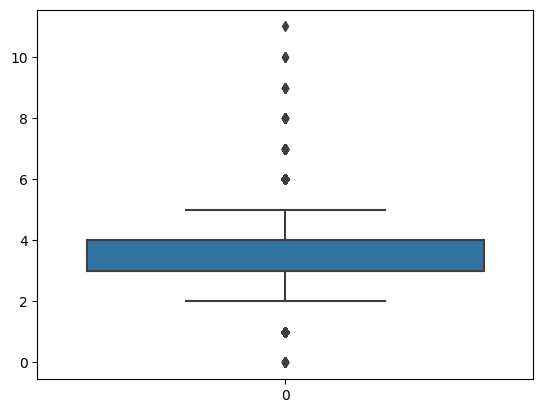

In [195]:
#Looking for outliers
sns.boxplot(df['bedrooms'])

<Axes: >

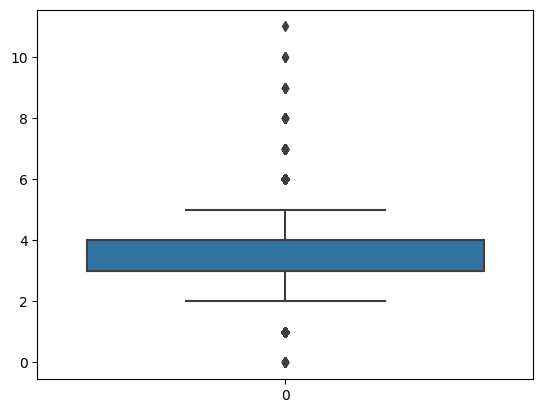

In [192]:
#Drop the outlier
df.drop(df[df['bedrooms'] > 15].index,inplace = True)
sns.boxplot(df['bedrooms'])

In [25]:
#Drop 'id' column since it is unnecessary to predict
df = df.drop(['id'], axis = 1)
#Convert 'time' column type
df['date'] = pd.to_datetime(df['date'])

In [159]:
#Calculate correlations to identify which variables need to be use to predict the price of house
correlations = df.corr()['price'].abs().sort_values(ascending=False)
#Find the features those correlations are higher than 0.5
top_features = correlations[correlations > 0.6].index.tolist()

print(top_features)

['price', 'sqft_living', 'grade', 'sqft_above']


In [83]:
results = ols("price ~ sqft_living + grade", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                 1.237e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:48:02   Log-Likelihood:            -2.9856e+05
No. Observations:               21605   AIC:                         5.971e+05
Df Residuals:                   21602   BIC:                         5.971e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.088e+05   1.29e+04    -47.175      

In [180]:
#Calculate its MSE value for OLS model:
pred_ols = results.predict(df[['sqft_living','grade']])
print('mse for OLS model is ', mean_squared_error(df['price'], pred_ols))


mse for OLS model is  58953773773.95024


In [84]:
"y_hat = -0.00006088 + 171.1677sqft_living + 0.00001034grade"

'y_hat = -0.00006088 + 171.1677sqft_living + 0.00001034grade'

In [85]:
#Predict results of price with these main features
pred_vals = results.predict(df[['sqft_living','grade']])

In [86]:
pred_vals

0        317240.378501
1        555163.421746
2        143630.513988
3        450751.150970
4        506255.332145
             ...      
21608    480580.183594
21609    614090.956062
21610    289853.553380
21611    492561.919585
21612    289853.553380
Length: 21605, dtype: float64

In [87]:
#Residuals
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [88]:
res

,y_hat,price
0,317240.378501,221900.0
1,555163.421746,538000.0
2,143630.513988,180000.0
3,450751.150970,604000.0
4,506255.332145,510000.0
...,...,...
21608,480580.183594,360000.0
21609,614090.956062,400000.0
21610,289853.553380,402101.0
21611,492561.919585,400000.0


In [89]:
#Looking for the difference between the predicted value and the actual value
res['error'] = res['y_hat'] - res['price']

In [90]:
res.head(1)

,y_hat,price,error
0,317240.378501,221900.0,95340.378501


In [91]:
#Calculate r^2 (coefficient)
res['sq_error'] = res['error']**2

In [92]:
np.sqrt(res['sq_error'].mean())

242803.9822036497

(array([3.0000e+00, 2.0000e+00, 1.4000e+01, 2.4000e+01, 6.8000e+01,
        1.7600e+02, 1.0590e+03, 1.4386e+04, 5.8350e+03, 3.8000e+01]),
 array([-3402652.84576913, -2961455.4493699 , -2520258.05297067,
        -2079060.65657144, -1637863.26017221, -1196665.86377298,
         -755468.46737375,  -314271.07097451,   126926.32542472,
          568123.72182395,  1009321.11822318]),
 <BarContainer object of 10 artists>)

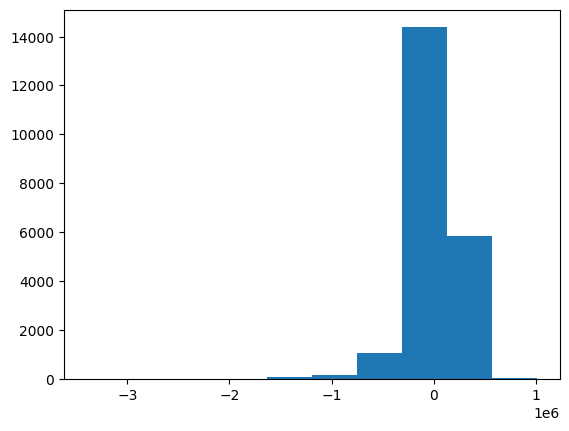

In [93]:
#Distribution of errors
plt.hist(res['error'])

(array([1.5375e+04, 5.0910e+03, 7.5700e+02, 2.1400e+02, 1.0000e+02,
        4.1000e+01, 1.7000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  75000.,  602500., 1130000., 1657500., 2185000., 2712500.,
        3240000., 3767500., 4295000., 4822500., 5350000.]),
 <BarContainer object of 10 artists>)

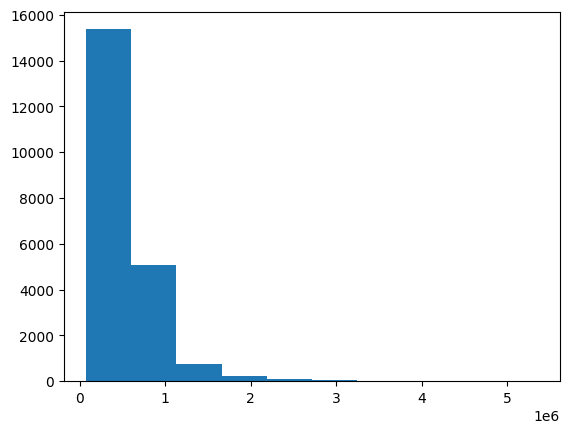

In [94]:
#Distribution of house price.
plt.hist(df['price'])

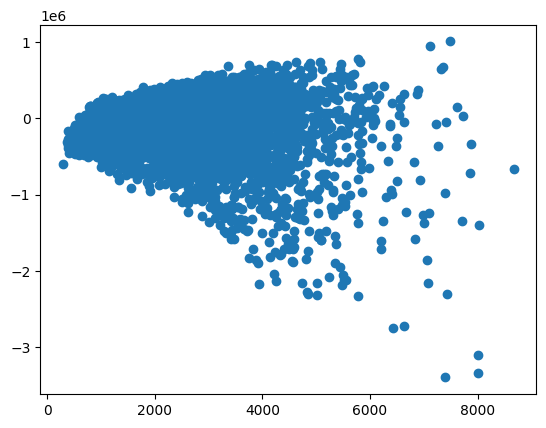

In [95]:
plt.scatter(df['sqft_living'],res['error'])

((array([-3.99694791, -3.78172022, -3.66398849, ...,  3.66398849,
          3.78172022,  3.99694791]),
  array([-3402652.84576913, -3348240.57499263, -3107328.89842253, ...,
           777309.09536299,   951131.88683799,  1009321.11822318])),
 (222330.2590166056, 1.263339565422804e-09, 0.91551492715311))

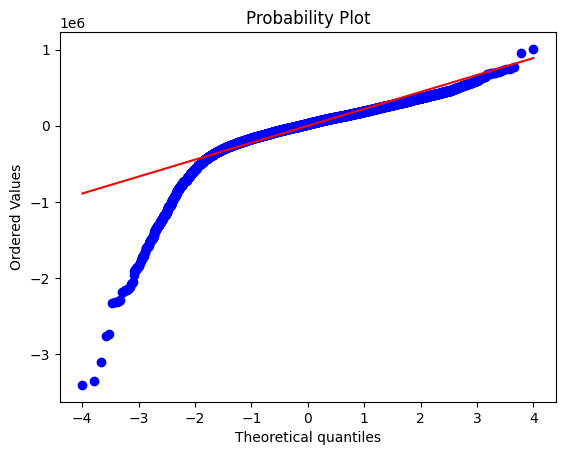

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [98]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_sqft_living  dfb_grade       cooks_d   
0          -0.000345         0.002330  -0.000815  4.931648e-06  \
1          -0.000672        -0.000723   0.000726  2.753413e-07   
2           0.001026        -0.000575  -0.000490  1.146252e-06   
3           0.003611         0.001978  -0.003060  9.369779e-06   
4          -0.000070        -0.000108   0.000102  7.853712e-09   
...              ...              ...        ...           ...   
21608       0.002712         0.004334  -0.003951  1.039602e-05   
21609       0.000545        -0.000300  -0.000909  1.306003e-05   
21610      -0.000053        -0.003603   0.001617  8.655163e-06   
21611       0.001916         0.003017  -0.002796  5.469874e-06   
21612      -0.000017        -0.001128   0.000506  8.485651e-07   

       standard_resid  hat_diag  dffits_internal  student_resid    dffits  
0           -0.392656  0.000096        -0.003846      -0.392648 -0.003846  
1           -0.070689  0.000165        -0.000909      -

In [99]:
infl.summary_frame()

,dfb_Intercept,dfb_sqft_living,dfb_grade,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.000345,0.002330,-0.000815,4.931648e-06,-0.392656,0.000096,-0.003846,-0.392648,-0.003846
1,-0.000672,-0.000723,0.000726,2.753413e-07,-0.070689,0.000165,-0.000909,-0.070688,-0.000909
2,0.001026,-0.000575,-0.000490,1.146252e-06,0.149791,0.000153,0.001854,0.149787,0.001854
3,0.003611,0.001978,-0.003060,9.369779e-06,0.631141,0.000071,0.005302,0.631132,0.005302
4,-0.000070,-0.000108,0.000102,7.853712e-09,0.015422,0.000099,0.000153,0.015422,0.000153
...,...,...,...,...,...,...,...,...,...
21608,0.002712,0.004334,-0.003951,1.039602e-05,-0.496612,0.000126,-0.005585,-0.496604,-0.005585
21609,0.000545,-0.000300,-0.000909,1.306003e-05,-0.881705,0.000050,-0.006259,-0.881700,-0.006259
21610,-0.000053,-0.003603,0.001617,8.655163e-06,0.462293,0.000121,0.005096,0.462284,0.005096
21611,0.001916,0.003017,-0.002796,5.469874e-06,-0.381216,0.000113,-0.004051,-0.381208,-0.004051


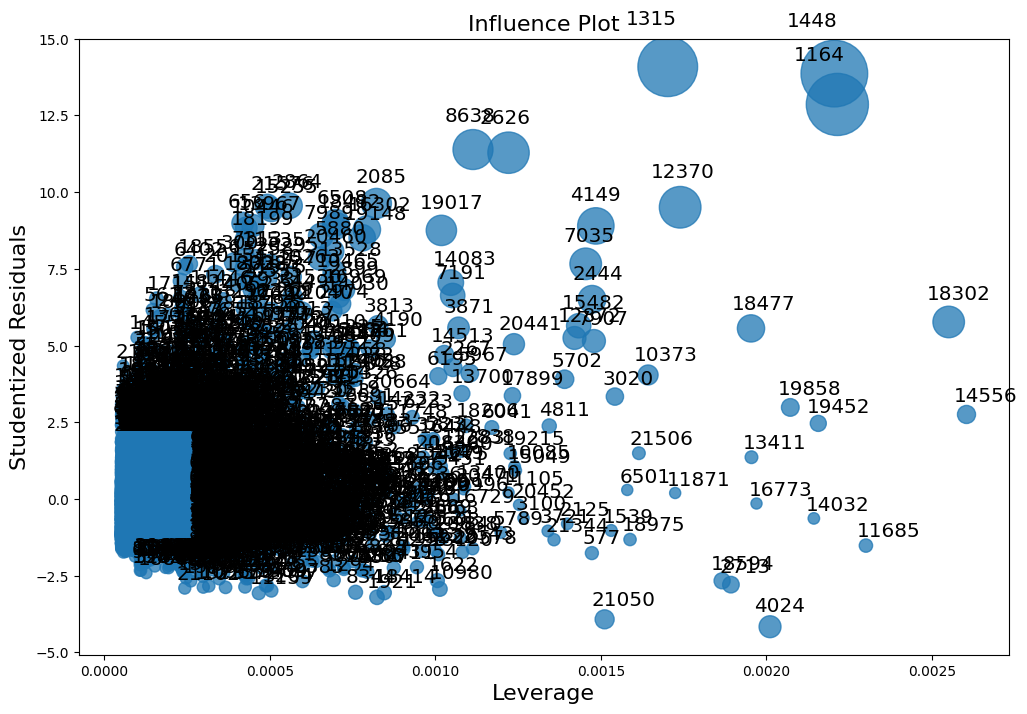

In [100]:
#Building the influence plot
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [164]:
#Create and split the categorical & numerical features
categorical_features = ['grade']
numerical_features = ['sqft_living']
target = ['price']

In [165]:
#Setting train and test value for prediction model
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df['price'],
                                                    test_size = 0.3, random_state=1234)

In [166]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [167]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [168]:
#Using LASSO model to predict
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [169]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living'])])),
                ('regressor', Lasso())])

In [170]:
lasso_pred = lasso_regression.predict(X_test)

In [171]:
print('mse for LASSO model is', np.sqrt(mean_squared_error(lasso_pred, y_test)))
print('R-squared for Ridge model is ', r2_score(lasso_pred, y_test))

mse for LASSO model is 228690.90846961972
R-squared for Ridge model is  0.3027975026314017


In [172]:
#Using Ridge model to predict
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [173]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living'])])),
                ('regressor', Ridge(alpha=3.0))])

In [174]:
pred_ridge = ridge_regression.predict(X_test)

In [175]:
print('mse for Ridge model is', np.sqrt(mean_squared_error(pred_ridge,y_test)))
print('R-squared for Ridge model is ', r2_score(pred_ridge, y_test))

mse for Ridge model is 228144.27097743153
R-squared for Ridge model is  0.28956144003298423


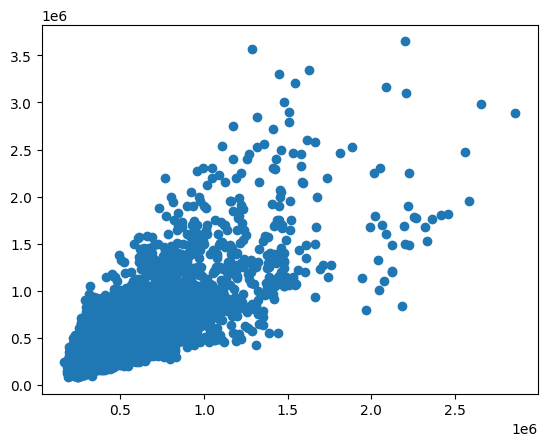

In [182]:
plt.scatter(pred_ridge, y_test)
plt.show()

In [184]:
res_Ridge = y_test - pred_ridge

((array([-3.702059  , -3.47070152, -3.34338495, ...,  3.34338495,
          3.47070152,  3.702059  ]),
  array([-1350127.5872667 , -1171452.9029233 , -1039356.60432683, ...,
          1714276.86260162,  1850039.6020585 ,  2280688.09892374])),
 (215500.79826141015, -578.5070251280495, 0.9440849875250957))

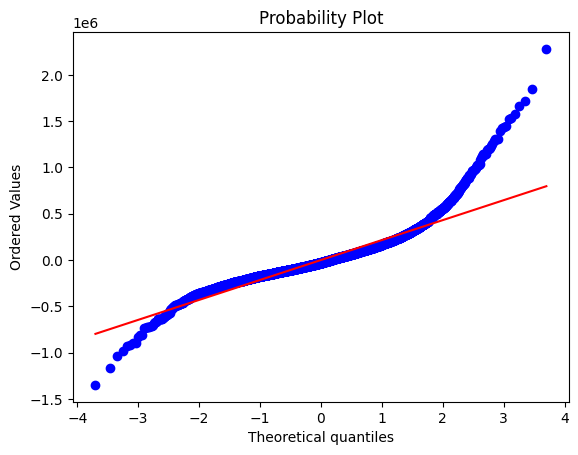

In [185]:
#Build Q-Q plot
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res_Ridge, dist='norm', plot=ax)

In [176]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [177]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [178]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [179]:
print('mse for Elastic Net model is', np.sqrt(mean_squared_error(elasticnet_pred, y_test)))
print('R-squared for Ridge model is ', r2_score(elasticnet_pred, y_test))

mse for Elastic Net model is 245280.9305900227
R-squared for Ridge model is  -0.3467827289017038


Question 1:
After data cleaning, I considered which features are influenced the price of house significantly; therefore, I extracted two variables (sqft_living & grade) by getting correlation. Using these two varibales to predict with OLS model.
Based on building pipeline to run for the training data, LASSO, Ridge, and Elastic Net model have been created for identifying which methods is the best to predict. 

According to the results of each r-squared and MSE values, OLS
Question 2:
According to 